In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as kr
import sklearn as sk
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [19]:
data_train=pd.read_csv("UNSW_NB15_training-set.csv")

In [21]:
data_train['attack_cat'] = data_train['attack_cat'].fillna('Normal')
data_train['attack_cat']
data_train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [22]:
print(data_train.dtypes)
print(data_train.columns)
data_train.shape

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

(175341, 45)

In [24]:
#Separate labels/ground truth

train_label_attack_category = np.array(data_train['attack_cat'])
train_label_label = np.array(data_train['label'])
train_label_attack_category_orig = train_label_attack_category

#Remove labels from data 
data_train = data_train.drop('attack_cat', axis = 1)
data_train = data_train.drop('label', axis = 1)

In [26]:
X = data_train.select_dtypes(include=[object])
X.head(5)

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN


In [27]:
#One hot encoding
X = pd.get_dummies(X)
X.shape

(175341, 155)

In [28]:
data_wo_X=data_train
data_wo_X=data_wo_X.drop('proto',axis=1)
data_wo_X=data_wo_X.drop('service',axis=1)
data_wo_X=data_wo_X.drop('state',axis=1)
data_wo_X=data_wo_X.drop('id',axis=1)

data_wo_X.shape
frames=[data_wo_X,X]
data_train=pd.concat(frames,axis=1)
del data_wo_X
del X
del frames
data_train.head(5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [30]:
data_train.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload',
       ...
       'service_ssl', 'state_CON', 'state_ECO', 'state_FIN', 'state_INT',
       'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no'],
      dtype='object', length=194)

In [33]:
data_top = data_train[['sttl', 'ct_state_ttl', 'dttl', 
'sload', 'dpkts', 'dmean', 'sbytes', 'dload', 'smean',
'tcprtt', 'dur']]

In [34]:
data_train = data_top
data_top.head(100)

,sttl,ct_state_ttl,dttl,sload,dpkts,dmean,sbytes,dload,smean,tcprtt,dur
0,252,0,254,1.415894e+04,4,43,258,8495.365234,43,0.000000,0.121478
1,62,1,252,8.395112e+03,38,1106,734,503571.312500,52,0.000000,0.649902
2,62,1,252,1.572272e+03,16,824,364,60929.230470,46,0.111897,1.623129
3,62,1,252,2.740179e+03,12,64,628,3358.622070,52,0.000000,1.681642
4,254,1,252,8.561499e+03,6,45,534,3987.059814,53,0.128381,0.449454
...,...,...,...,...,...,...,...,...,...,...,...
95,254,2,0,2.196364e+08,0,0,604,0.000000,302,0.000000,0.000011
96,254,2,0,2.208000e+08,0,0,552,0.000000,276,0.000000,0.000010
97,31,0,29,3.902197e+02,24,180,1920,879.856995,87,0.000852,37.578835
98,254,2,0,6.378182e+08,0,0,1754,0.000000,877,0.000000,0.000011


In [37]:
feature_list = list(data_train.columns)
feature_list

['sttl',
 'ct_state_ttl',
 'dttl',
 'sload',
 'dpkts',
 'dmean',
 'sbytes',
 'dload',
 'smean',
 'tcprtt',
 'dur']

In [38]:
data_train = np.array(data_train)

In [39]:
#transform string labels to values
from sklearn import preprocessing
lencoder = preprocessing.LabelEncoder()

lencoder.fit(train_label_attack_category)
list(lencoder.classes_)
train_label_attack_category = lencoder.transform(train_label_attack_category)

#test_label_attack_category = lencoder.transform(test_label_attack_category)

lencoder.fit(train_label_label)

train_label_label = lencoder.transform(train_label_label)

#test_label_label = lencoder.transform(test_label_label)

In [42]:
train_label_label
train_label_label.shape

(175341,)

In [43]:
train_label_attack_category.shape

(175341,)

In [44]:
from sklearn.model_selection import train_test_split
data_train, data_test, train_labels, test_labels = train_test_split(data_train, train_label_label, test_size = 0.25, random_state = 50)
data_test.shape
data_train.shape

(131505, 11)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators = 5, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels)

RandomForestClassifier(max_depth=10, n_estimators=5, n_jobs=2, random_state=0)

In [52]:
predictions=rf.predict(data_test)

errors=abs(predictions-test_labels)

print('Mean Absolute Error',round(np.mean(errors),2),'degree')

Mean Absolute Error 0.06 degree


In [53]:
predictions

rf.predict_proba(data_test)[0:10]

array([[0.41471303, 0.58528697],
       [0.29154678, 0.70845322],
       [0.01354884, 0.98645116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00359672, 0.99640328],
       [0.00108833, 0.99891167],
       [0.00319744, 0.99680256],
       [0.55071383, 0.44928617]])

In [54]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predictions)

array([[11524,  2364],
       [  341, 29607]], dtype=int64)

In [55]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_labels, predictions)

(array([0.97126001, 0.92605799]),
 array([0.82978111, 0.9886136 ]),
 array([0.89496369, 0.95631389]),
 array([13888, 29948], dtype=int64))

In [56]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

(0.948658999240818, 0.9091973514460394, 0.925638793754251, None)

In [57]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / (test_labels+1))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.22 %.


In [58]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sttl                 Importance: 0.4
Variable: dload                Importance: 0.22
Variable: dmean                Importance: 0.09
Variable: tcprtt               Importance: 0.08
Variable: ct_state_ttl         Importance: 0.06
Variable: sbytes               Importance: 0.05
Variable: smean                Importance: 0.05
Variable: sload                Importance: 0.03
Variable: dpkts                Importance: 0.02
Variable: dttl                 Importance: 0.01
Variable: dur                  Importance: 0.01


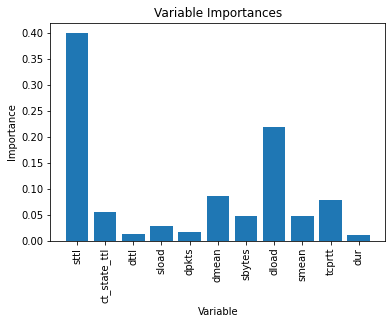

In [59]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [60]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.399232)
2. feature 7 (0.219779)
3. feature 5 (0.085033)
4. feature 9 (0.078059)
5. feature 1 (0.055512)
6. feature 6 (0.047560)
7. feature 8 (0.047286)
8. feature 3 (0.028239)
9. feature 4 (0.016060)
10. feature 2 (0.012755)
11. feature 10 (0.010484)


In [61]:
#Lets check category wise
train_label_attack_category_orig

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [62]:
from sklearn import tree
from sklearn.tree import export_text
i_tree = 0
for tree_in_forest in rf.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
        r = export_text(tree_in_forest)
        print("TREE ", i_tree)
        print(r)  
    i_tree = i_tree + 1

TREE  0
|--- feature_0 <= 61.00
|   |--- feature_6 <= 72.00
|   |   |--- feature_10 <= 0.00
|   |   |   |--- class: 0.0
|   |   |--- feature_10 >  0.00
|   |   |   |--- feature_1 <= 1.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  1.00
|   |   |   |   |--- feature_6 <= 53.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  53.00
|   |   |   |   |   |--- class: 1.0
|   |--- feature_6 >  72.00
|   |   |--- class: 0.0
|--- feature_0 >  61.00
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 44685714.00
|   |   |   |--- feature_10 <= 1.64
|   |   |   |   |--- feature_9 <= 0.09
|   |   |   |   |   |--- feature_3 <= 34222220.00
|   |   |   |   |   |   |--- feature_8 <= 44.00
|   |   |   |   |   |   |   |--- feature_10 <= 0.04
|   |   |   |   |   |   |   |   |--- feature_6 <= 51.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_6 >  51.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 38.50
|   

TREE  4
|--- feature_0 <= 61.00
|   |--- feature_5 <= 14.00
|   |   |--- feature_6 <= 53.00
|   |   |   |--- class: 0.0
|   |   |--- feature_6 >  53.00
|   |   |   |--- feature_6 <= 76.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_6 >  76.00
|   |   |   |   |--- class: 0.0
|   |--- feature_5 >  14.00
|   |   |--- class: 0.0
|--- feature_0 >  61.00
|   |--- feature_3 <= 45166666.00
|   |   |--- feature_6 <= 987.00
|   |   |   |--- feature_6 <= 977.00
|   |   |   |   |--- feature_6 <= 561.00
|   |   |   |   |   |--- feature_0 <= 62.50
|   |   |   |   |   |   |--- feature_10 <= 0.02
|   |   |   |   |   |   |   |--- feature_6 <= 127.00
|   |   |   |   |   |   |   |   |--- feature_6 <= 119.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_6 >  119.00
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 121609.58
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_7 >  121609

In [63]:
import pickle as pickle
filename = 'final_rf_model_5trees.sav'
pickle.dump(rf, open(filename, 'wb'))

In [64]:
one_hot_train_label_attack_category_orig = pd.get_dummies(train_label_attack_category_orig)
one_hot_train_label_attack_category_orig.describe()
print(one_hot_train_label_attack_category_orig.sum(axis=0))

Analysis           2000
Backdoor           1746
DoS               12264
Exploits          33393
Fuzzers           18184
Generic           40000
Normal            56000
Reconnaissance    10491
Shellcode          1133
Worms               130
dtype: int64
